In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [12]:
x_train[0].shape

(28, 28)

In [3]:
# Build the model using functional API
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [4]:
# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 11ms/step - loss: 0.3410 - accuracy: 0.8912 - val_loss: 0.1217 - val_accuracy: 0.9618
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1034 - accuracy: 0.9686 - val_loss: 0.0917 - val_accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0721 - accuracy: 0.9774 - val_loss: 0.0790 - val_accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0591 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0564 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.0536 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0447 -

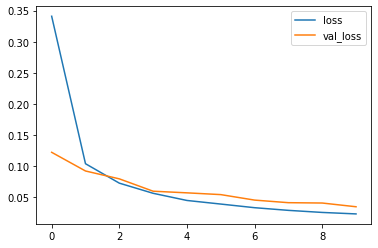

In [5]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

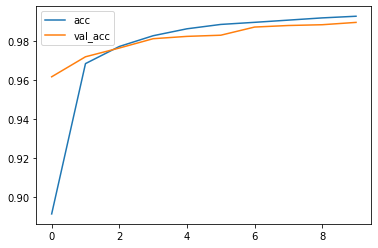

In [6]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 975    0    0    1    0    0    3    1    0    0]
 [   0 1130    2    0    0    0    2    1    0    0]
 [   1    1 1024    0    1    0    2    2    1    0]
 [   0    0    4 1003    0    1    0    0    2    0]
 [   0    0    0    0  975    0    0    3    0    4]
 [   2    1    0   11    0  873    3    0    1    1]
 [   2    3    0    0    4    2  945    0    1    1]
 [   0    1    4    1    0    1    0 1014    2    5]
 [   3    0    2    1    0    1    0    1  962    4]
 [   2    1    0    1    2    3    0    3    0  997]]


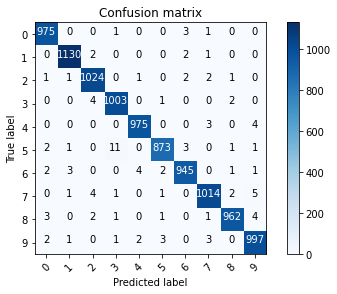

In [18]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

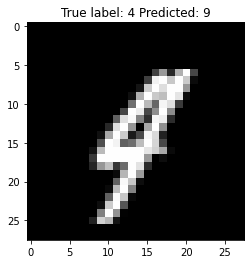

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));